In [2]:
### Keras and Tensorflow >2.0

In [3]:
import pandas_datareader as pdr

In [4]:
key = 'e80b457b8ddb56547ee91753f004584802eafc5c'

In [5]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-5-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [6]:
df.to_csv('AAPL.csv')

In [7]:
import pandas as pd

In [8]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-09-13 00:00:00+00:00  226.41  228.35  222.57  223.52  41706377   
       2018-09-14 00:00:00+00:00  223.84  226.84  222.52  225.75  31999289   
       2018-09-17 00:00:00+00:00  217.88  222.95  217.27  222.15  37195133   
       2018-09-18 00:00:00+00:00  218.24  221.85  217.12  217.79  31571712   
       2018-09-19 00:00:00+00:00  218.37  219.62  215.30  218.50  27123833   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-09-13 00:00:00+00:00  54.206141  54.670608  53.286785  53.514230   
       2018-09-14 00:00:00+00:00  53.590843  54.309090  53.274814  54.048127   
       2018-09-17 00:00:00+00:00  52.163924  53.377763  52.017881  53.186230   
       2018-09-18 00:00:00+00:00  52.250114  53.114405  51.981968  52.142377   
       2018-09-19 00:00:00+00:00  52.281238  52.580508  51.546231  52.312362   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-09-13 00:00:00+00:00  166825508      0.0          1.0  
       2018-09-14 00:00:00+00:00  127997156      0.0          1.0  
       2018-09-17 00:00:00+00:00  148780532      0.0          1.0  
       2018-09-18 00:00:00+00:00  126286848      0.0          1.0  
       2018-09-19 00:00:00+00:00  108495332      0.0          1.0

In [9]:
df.tail()

close     high     low    open     volume  \
symbol date                                                                    
AAPL   2023-09-05 00:00:00+00:00  189.70  189.980  187.61  188.28   45280027   
       2023-09-06 00:00:00+00:00  182.91  188.850  181.47  188.40   81755816   
       2023-09-07 00:00:00+00:00  177.56  178.210  173.54  175.18  112488803   
       2023-09-08 00:00:00+00:00  178.18  180.239  177.79  178.35   65602066   
       2023-09-11 00:00:00+00:00  179.36  180.300  177.34  180.07   58953052   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
AAPL   2023-09-05 00:00:00+00:00    189.70  189.980  187.61   188.28   
       2023-09-06 00:00:00+00:00    182.91  188.850  181.47   188.40   
       2023-09-07 00:00:00+00:00    177.56  178.210  173.54   175.18   
       2023-09-08 00:00:00+00:00    178.18  180.239  177.79   178.35   
       2023-09-11 00:00:00+00:00    179.36  180.300  177.34   180.07   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2023-09-05 00:00:00+00:00   45280027      0.0          1.0  
       2023-09-06 00:00:00+00:00   81755816      0.0          1.0  
       2023-09-07 00:00:00+00:00  112488803      0.0          1.0  
       2023-09-08 00:00:00+00:00   65602066      0.0          1.0  
       2023-09-11 00:00:00+00:00   58953052      0.0          1.0

In [10]:
df1 = df.reset_index()['close']

In [11]:
df1

0       226.41
1       223.84
2       217.88
3       218.24
4       218.37
         ...  
1251    189.70
1252    182.91
1253    177.56
1254    178.18
1255    179.36
Name: close, Length: 1256, dtype: float64

In [12]:
df1.shape

(1256,)

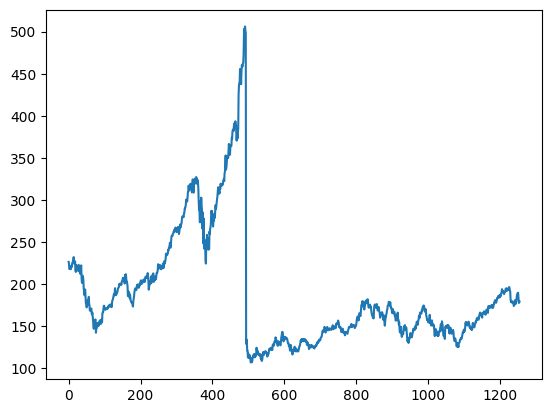

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
### LSTM are sensitive to the scale of the data. so we apply MinMAx scaler

In [15]:
import numpy as np

In [16]:
df1

0       226.41
1       223.84
2       217.88
3       218.24
4       218.37
         ...  
1251    189.70
1252    182.91
1253    177.56
1254    178.18
1255    179.36
Name: close, Length: 1256, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
df1

array([[0.29948654],
       [0.29304947],
       [0.27812148],
       ...,
       [0.17713212],
       [0.17868503],
       [0.18164058]])

In [19]:
df1.shape
## as we can see all values are now between 0 and 1

(1256, 1)

In [20]:
print(df1)

[[0.29948654]
 [0.29304947]
 [0.27812148]
 ...
 [0.17713212]
 [0.17868503]
 [0.18164058]]


In [21]:
## splitting the data set into training and the test dataset
training_size = int(len(df1)*0.65)
testing_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [22]:
training_size, testing_size

(816, 440)

In [23]:
import numpy
#convert an array of values into dataset matrix
def create_dataset(dataset, timestamp=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-timestamp-1):
    a = dataset[i:(i+timestamp),0]  ###i=0,  0,1,2,3,....99 -----100 if timestamp=100
    dataX.append(a)
    dataY.append(dataset[i+timestamp, 0])
  return numpy.array(dataX), numpy.array(dataY)


In [24]:
## reshape into X = t, t+1, t+2, t+3 and Y=t+4
time_stamp = 100
X_train, y_train = create_dataset(train_data, time_stamp)
X_test, y_test = create_dataset(test_data, time_stamp)

In [25]:
print(X_train)

[[0.29948654 0.29304947 0.27812148 ... 0.16132749 0.16866625 0.16881653]
 [0.29304947 0.27812148 0.27902317 ... 0.16866625 0.16881653 0.16055103]
 [0.27812148 0.27902317 0.27934878 ... 0.16881653 0.16055103 0.15922354]
 ...
 [0.1059737  0.10429555 0.09906074 ... 0.14642455 0.14509706 0.14256731]
 [0.10429555 0.09906074 0.08919224 ... 0.14509706 0.14256731 0.1377583 ]
 [0.09906074 0.08919224 0.09845961 ... 0.14256731 0.1377583  0.14647464]]


In [26]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [27]:
print(X_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [29]:
## create a stacked LSTM model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 15s 631ms/step - loss: 0.0398 - val_loss: 0.0015
Epoch 2/100
12/12 [==============================] - 6s 476ms/step - loss: 0.0129 - val_loss: 7.6186e-04
Epoch 3/100
12/12 [==============================] - 5s 426ms/step - loss: 0.0097 - val_loss: 7.1369e-04
Epoch 4/100
12/12 [==============================] - 4s 301ms/step - loss: 0.0082 - val_loss: 6.1490e-04
Epoch 5/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0069 - val_loss: 3.0684e-04
Epoch 6/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0064 - val_loss: 3.7555e-04
Epoch 7/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0063 - val_loss: 3.1402e-04
Epoch 8/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0057 - val_loss: 4.8104e-04
Epoch 9/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0051 - val_loss: 4.7742e-04
Epoch 10/100
12/12 [==============================] - 3s 2

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.13.0'

In [36]:
## lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 36ms/step


In [37]:
##Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [38]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

221.68754601328274

In [39]:
### Test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

159.61875455198364

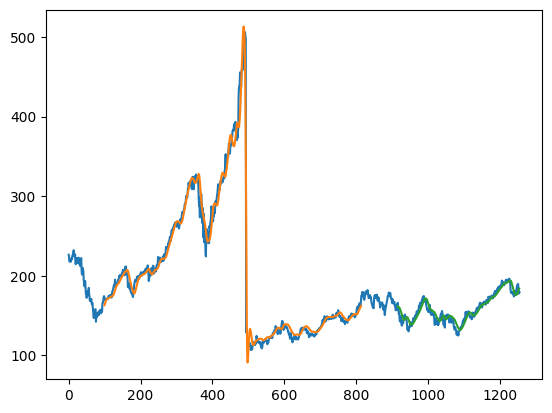

In [40]:
##plotting
# shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[: , :] = numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[: , :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
len(test_data)

440

In [46]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [47]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [48]:
temp_input

[0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,
 0.1834690043832185,
 0.1856230432060112,
 0.18219160926737632,
 0.18126487163431432,
 0.1777833437695679,
 0.18467125860989347,
 0.18564809016906697,
 0.19273638071383836,
 0.1915341264871634,
 0.19313713212273004,
 0.19829680651221032,
 0.1955666875391358,
 0.1957921102066374,
 0.1931621790857858,
 0.2007764558547276,
 0.19997495303694424,
 0.19

In [49]:
#demo for next 10 days
from numpy import array
lst_output = []
n_steps = 100
i=0
while(i<30):

  if(len(temp_input)>100):
    #print(temp_input)
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1

  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

[0.19325589]
101
1 day input [0.14980589 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415
 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838
 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134
 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394
 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567 0.183469
 0.18562304 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809
 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211
 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202
 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374
 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879 0.21828428
 0.21763306 0.2210645  0.21613024 0.21314966 0.21517846 0.21735755
 0.21956168 0.21635567 0.22289292 0.22444584 0.22232937 0.21475266
 0.21122104 0.18822793 0.18036318 0.18274264 0.17871008 0.17815905
 0.1777082  0.18189105 0.17685661 0.17465247 0.1682154  0.16944271
 0.17282405 0.17630557 0.18604884 0

In [50]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [51]:
import matplotlib.pyplot as plt

In [52]:
len(df1)

1256

In [59]:
df3 = df1.tolist()
df3.extend(lst_output)

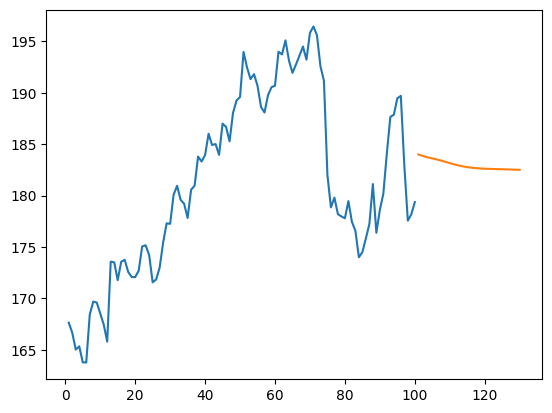

In [77]:
plt.plot(day_new, scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

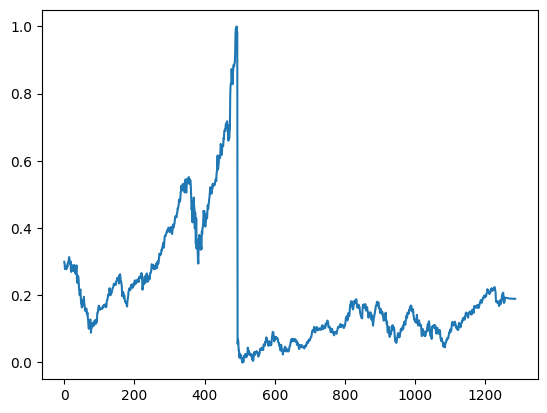

In [78]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[00:])